In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
income_2016 = pd.read_csv('../data/raw/2016.csv')
income_2017 = pd.read_csv('../data/raw/2017.csv')
income_2018 = pd.read_csv('../data/raw/2018.csv')
income_2019 = pd.read_csv('../data/raw/2019.csv')

income_2016 = income_2016[['Postcode','Median salary or wages']]
income_2017 = income_2017[['Postcode','Median salary or wages']]
income_2018 = income_2018[['Postcode','Median salary or wages']]
income_2019 = income_2019[['Postcode','Median salary or wages']]

income_2016 = income_2016.iloc[656:1318]
income_2017 = income_2017.iloc[655:1317]
income_2018 = income_2018.iloc[655:1317]
income_2019 = income_2019.iloc[653:1316]

income = pd.merge(income_2016, income_2017, on='Postcode', how='left')
income = income.merge(income_2018, on='Postcode', how='left')
income = income.merge(income_2019, on='Postcode', how='left')

income = income.fillna(40000)
income.columns = ['Postcode','2016','2017','2018','2019']

income

/var/folders/mv/s3dk3thn01b8yf4vz18zfjlr0000gn/T/ipykernel_86162/1904112732.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Median salary or wages_x'} in the result is deprecated and will raise a MergeError in a future version.
  income = income.merge(income_2019, on='Postcode', how='left')


,Postcode,2016,2017,2018,2019
0,3000,31480,32476,33314.0,34580.0
1,3002,61342,63689,67362.0,69972.0
2,3003,46442,49415,50578.0,51259.0
3,3004,59385,60776,62323.0,64457.0
4,3006,53857,53668,55730.0,54860.0
...,...,...,...,...,...
657,3988,42542,44433,46548.0,46832.0
658,3991,33915,39348,39090.0,38150.0
659,3992,38625,41864,41444.0,43306.0
660,3995,38190,39388,40803.0,41877.0


In [109]:
income['rate'] = income['2019'] / income['2018']

income['2020'] = income['2019'] * income['rate']

income['2021'] = income['2020'] * income['rate']

income['2022'] = income['2021'] * income['rate']

income['2023'] = income['2022'] * income['rate']

income['2024'] = income['2023'] * income['rate']

income['2025'] = income['2024'] * income['rate']

income = income.drop(columns = 'rate')

income.to_csv('../data/curated/predict_income.csv')

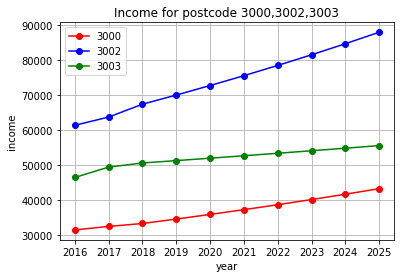

<Figure size 432x288 with 0 Axes>

In [110]:
# plot the income for postcode 3000,3002,3003

from logging import handlers


x = income.columns.drop('Postcode')
y1 = income.iloc[0][1:]
y2 = income.iloc[1][1:]
y3 = income.iloc[2][1:]

plt.plot(x,y1, color='red', marker='o')
plt.plot(x,y2, color='blue', marker='o')
plt.plot(x,y3, color='green', marker='o')
plt.title('Income for postcode 3000,3002,3003')
plt.xlabel('year')
plt.ylabel('income')
plt.legend(['3000','3002','3003'])
plt.grid()
plt.show()

plt.savefig('../plots/predict_income.png')
